In [3]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
pd.set_option('display.max_columns', None)
flats = pd.read_csv('data/_data.csv',index_col=0)
flats.tail()

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,Сдаётся светлая теплая квартира (студия) с бал...,Евроремонт,NaN,Балкон (1),NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,Сдам однокомнатную квартиру на длительный срок...,Евроремонт,NaN,Лоджия (1),Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,Рассматриваются квартиранты только славяне и т...,Дизайнерский,NaN,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79660611965,Двухкомнатная уютная квартира с видом во внутр...,Евроремонт,NaN,Лоджия (1),Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525
23367,274672243,"2, Оба варианта",Квартира,м. Говорово (10 мин пешком),"Москва, улица Богданова, 2к1, ш. Боровское (3 ...",90.0/48.2/15.5,"6/23, Панельный",NaN,"57000.0 руб./ За месяц, Залог - 60000 руб., Ко...",+79623641533,Сдается просторная двухкомнатная квартира ВПЕР...,Косметический,"26,2+15,5-22,0",Лоджия (1),Во двор,Раздельный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,NaN,Пасс (3),Да,https://www.cian.ru/rent/flat/274672243


In [5]:
rooms = pd.DataFrame(flats['Количество комнат'].fillna('Not mentioned').map(lambda x: x.split(',')).to_list(),columns=['Rooms','RoomTypes'])
RoomAmount = rooms.groupby('Rooms')['Rooms'].count()

Text(0, 0.5, 'Amount of flats')

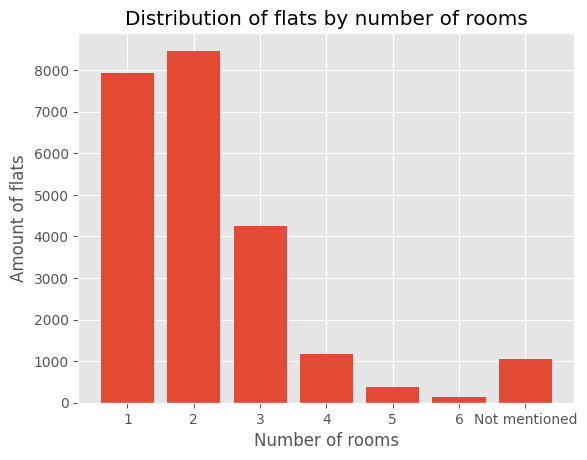

In [6]:
plt.style.use('ggplot')
#plt.rcParams['figure.dpi'] = 150

plt.bar(RoomAmount.index,RoomAmount.values)

plt.title('Distribution of flats by number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Amount of flats')


In [7]:
MinToSubway = flats['Метро'].fillna('').map(lambda x: re.search(r'(\d) мин',x).group(1) if re.search(r'(\d) мин',x) else 'Not mentioned').to_frame()
MinToSubway = MinToSubway.groupby('Метро')['Метро'].count()
MinToSubway

Метро
0                3054
1                1321
2                1987
3                1950
4                2102
5                3856
6                1726
7                1964
8                1677
9                1376
Not mentioned    2355
Name: Метро, dtype: int64

Text(0, 0.5, 'Amount of flats')

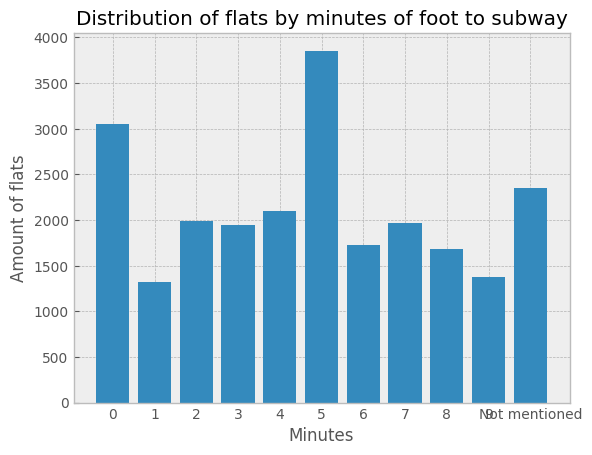

In [8]:
plt.style.use('bmh')
#plt.rcParams['figure.dpi'] = 150

plt.bar(MinToSubway.index,MinToSubway.values)

plt.title('Distribution of flats by minutes of foot to subway')
plt.xlabel('Minutes')
plt.ylabel('Amount of flats')


In [9]:
Prices = flats['Цена'].fillna('').map(lambda x: float(re.search(r'(\d+\.\d) руб\./',x).group(1)) if re.search(r'(\d+\.\d) руб\./',x) else 0).to_frame()
Prices
#     print(elem)
#     print(re.search(r'(\d+\.\d) руб\./',elem))
#RoomAmount = rooms.groupby('Rooms')['Rooms'].count()
Prices = Prices.groupby(['Цена'])['Цена'].count()
Prices


Цена
0.0          24
10000.0       1
10500.0       1
12000.0       3
12400.0       1
             ..
1700000.0     1
1775000.0     1
2000000.0     1
2500000.0     5
3000000.0     4
Name: Цена, Length: 594, dtype: int64

Text(0, 0.5, 'Amount of flats')

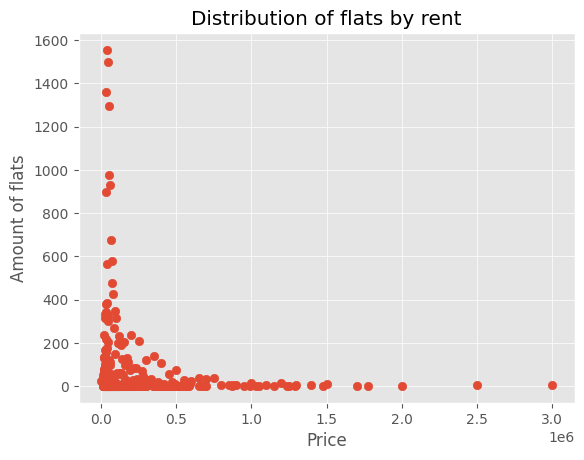

In [10]:
plt.style.use('ggplot')
#plt.rcParams['figure.dpi'] = 150

plt.scatter(Prices.index,Prices)

plt.title('Distribution of flats by rent')
plt.xlabel('Price')
plt.ylabel('Amount of flats')

In [11]:
df = pd.read_csv('~/DS_Bootcamp/FlatPrices/data/_data.csv')
pd.set_option('display.max_columns', None)
df.head(5)


,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


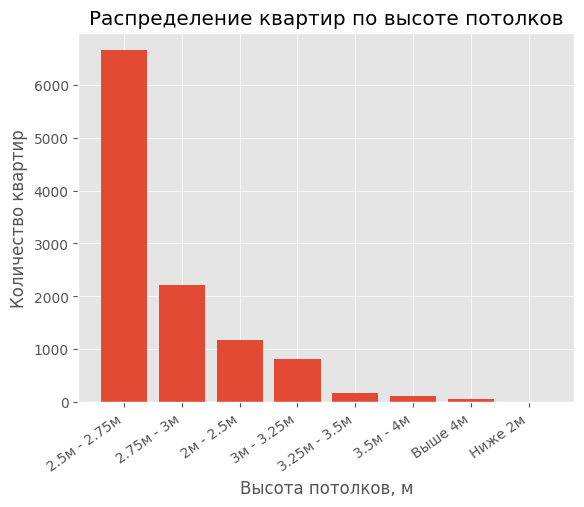

In [12]:
plt.style.use('ggplot')
grouped_df = pd.cut(df['Высота потолков, м'], 
                    bins=[0,2, 2.5, 2.75, 3, 3.25, 3.5, 4, np.inf], 
                    labels=['Ниже 2м','2м - 2.5м', '2.5м - 2.75м', '2.75м - 3м', '3м - 3.25м', '3.25м - 3.5м', '3.5м - 4м', 'Выше 4м'])
counts = grouped_df.value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир')
plt.xticks(rotation=35, ha="right")
plt.title('Распределение квартир по высоте потолков');


/tmp/ipykernel_5964/2717864720.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Можно с детьми/животными'].fillna('С детьми и животными нельзя', inplace=True)


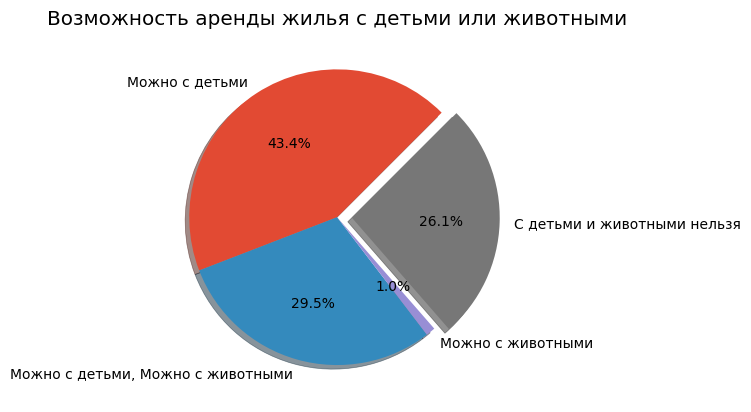

In [13]:
df['Можно с детьми/животными'].fillna('С детьми и животными нельзя', inplace=True)
df_children = df.loc[:, 'Можно с детьми/животными']
df_children_cat = pd.Categorical(df_children)

plt.pie(df_children_cat.value_counts(), labels=df_children_cat.categories, explode=(0,0,0,0.1), autopct='%1.1f%%',startangle=45, shadow = True)
plt.title('Возможность аренды жилья с детьми или животными');


In [14]:


df_children_cat.value_counts()


Можно с детьми                       10134
Можно с детьми, Можно с животными     6899
Можно с животными                      239
С детьми и животными нельзя           6096
Name: count, dtype: int64